**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.models import model_from_json
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

****Data Preparation****

**Importing Datasets**

In [ ]:
#10k

df_10k=pd.read_csv('Final_DataSet_10k.csv', index_col='date', parse_dates=['date'])
df_10k['Close']=df_10k['close'].shift(-1,fill_value=0)
df_10k.drop(df_10k.tail(1).index,inplace=True)
df_10k = df_10k.drop(columns=['close'])

#20k

df_20k=pd.read_csv('Final_DataSet_20k.csv', index_col='date', parse_dates=['date'])
df_20k['Close']=df_20k['close'].shift(-1,fill_value=0)
df_20k.drop(df_20k.tail(1).index,inplace=True)
df_20k = df_20k.drop(columns=['close'])

#40k

df_40k=pd.read_csv('Final_DataSet_40k.csv', index_col='date', parse_dates=['date'])
df_40k['Close']=df_40k['close'].shift(-1,fill_value=0)
df_40k.drop(df_40k.tail(1).index,inplace=True)
df_40k = df_40k.drop(columns=['close'])

**Data Partitioning**

In [ ]:
#10k

train_size_10k = int(len(df_10k)*0.7)
validation_size_10k= int(len(df_10k)*0.9)
train_dataset_10k, validation_dataset_10k, test_dataset_10k = df_10k.iloc[:train_size_10k], df_10k.iloc[train_size_10k:validation_size_10k],df_10k.iloc[validation_size_10k:]

#20k

train_size_20k = int(len(df_20k)*0.7)
validation_size_20k= int(len(df_20k)*0.9)
train_dataset_20k, validation_dataset_20k, test_dataset_20k = df_20k.iloc[:train_size_20k], df_20k.iloc[train_size_20k:validation_size_20k],df_20k.iloc[validation_size_20k:]

#40k

train_size_40k = int(len(df_40k)*0.85)
validation_size_40k= int(len(df_40k)*0.9)
train_dataset_40k, validation_dataset_40k, test_dataset_40k = df_40k.iloc[:train_size_40k], df_40k.iloc[train_size_40k:validation_size_40k],df_40k.iloc[validation_size_40k:]

**Data Normalization and Splitting**

In [ ]:
#10k

scaler_x_10k = MinMaxScaler(feature_range = (0,1))
scaler_y_10k = MinMaxScaler(feature_range = (0,1))

x_train_10k = train_dataset_10k.drop('Close', axis=1)
y_train_10k = train_dataset_10k.loc[:,['Close']]

x_validation_10k = validation_dataset_10k.drop('Close', axis=1)
y_validation_10k = validation_dataset_10k.loc[:,['Close']]

x_test_10k = test_dataset_10k.drop('Close', axis=1)
y_test_10k = test_dataset_10k.loc[:,['Close']]

input_scaler_10k = scaler_x_10k.fit(x_train_10k)
output_scaler_10k = scaler_y_10k.fit(y_train_10k)

train_y_norm_10k = output_scaler_10k.transform(y_train_10k)
train_x_norm_10k = input_scaler_10k.transform(x_train_10k)

validation_y_norm_10k = output_scaler_10k.transform(y_validation_10k)
validation_x_norm_10k = input_scaler_10k.transform(x_validation_10k)

test_y_norm_10k = output_scaler_10k.transform(y_test_10k)
test_x_norm_10k = input_scaler_10k.transform(x_test_10k)

test_inverse_10k = scaler_y_10k.inverse_transform(test_y_norm_10k)

#20k

scaler_x_20k = MinMaxScaler(feature_range = (0,1))
scaler_y_20k = MinMaxScaler(feature_range = (0,1))

x_train_20k = train_dataset_20k.drop('Close', axis=1)
y_train_20k = train_dataset_20k.loc[:,['Close']]

x_validation_20k = validation_dataset_20k.drop('Close', axis=1)
y_validation_20k = validation_dataset_20k.loc[:,['Close']]

x_test_20k = test_dataset_20k.drop('Close', axis=1)
y_test_20k = test_dataset_20k.loc[:,['Close']]

input_scaler_20k = scaler_x_20k.fit(x_train_20k)
output_scaler_20k = scaler_y_20k.fit(y_train_20k)

train_y_norm_20k = output_scaler_20k.transform(y_train_20k)
train_x_norm_20k = input_scaler_20k.transform(x_train_20k)

validation_y_norm_20k = output_scaler_20k.transform(y_validation_20k)
validation_x_norm_20k = input_scaler_20k.transform(x_validation_20k)

test_y_norm_20k = output_scaler_20k.transform(y_test_20k)
test_x_norm_20k = input_scaler_20k.transform(x_test_20k)

test_inverse_20k = scaler_y_20k.inverse_transform(test_y_norm_20k)

#40k

scaler_x_40k = MinMaxScaler(feature_range = (0,1))
scaler_y_40k = MinMaxScaler(feature_range = (0,1))

x_train_40k = train_dataset_40k.drop('Close', axis=1)
y_train_40k = train_dataset_40k.loc[:,['Close']]

x_validation_40k = validation_dataset_40k.drop('Close', axis=1)
y_validation_40k = validation_dataset_40k.loc[:,['Close']]

x_test_40k = test_dataset_40k.drop('Close', axis=1)
y_test_40k = test_dataset_40k.loc[:,['Close']]

input_scaler_40k = scaler_x_40k.fit(x_train_40k)
output_scaler_40k = scaler_y_40k.fit(y_train_40k)

train_y_norm_40k = output_scaler_40k.transform(y_train_40k)
train_x_norm_40k = input_scaler_40k.transform(x_train_40k)

validation_y_norm_40k = output_scaler_40k.transform(y_validation_40k)
validation_x_norm_40k = input_scaler_40k.transform(x_validation_40k)

test_y_norm_40k = output_scaler_40k.transform(y_test_40k)
test_x_norm_40k = input_scaler_40k.transform(x_test_40k)

test_inverse_40k = scaler_y_40k.inverse_transform(test_y_norm_40k)

**Sliding Window**

In [ ]:
#10k

def sliding_window_10k (data, close_data, lag=1 ):

  data_array= []
  close_data_array= []

  for i in range (len(data)-lag):
     time_step= data [i:i+lag:]
     data_array.append(time_step)
     close_data_array.append(close_data[i+lag:i+lag+1])

  return np.array(data_array), np.array(close_data_array)

LAG_10k=2



x_train_10k , y_train_10k =  sliding_window_10k(train_x_norm_10k, train_y_norm_10k, LAG_10k)
x_validation_10k, y_validation_10k = sliding_window_10k(validation_x_norm_10k, validation_y_norm_10k, LAG_10k)
x_test_10k, y_test_10k= sliding_window_10k(test_x_norm_10k, test_y_norm_10k, LAG_10k)



test_1D_10k= y_test_10k [:, 0, 0]

M_10k=[]

for i in range (len(test_1D_10k)):

  D=[]
  D.append(test_1D_10k[i])
  M_10k.append(D)



y_test_10k=scaler_y_10k.inverse_transform(M_10k)


#20k

def sliding_window_20k (data, close_data, lag=1 ):

  data_array= []
  close_data_array= []

  for i in range (len(data)-lag):
     time_step= data [i:i+lag:]
     data_array.append(time_step)
     close_data_array.append(close_data[i+lag:i+lag+1])

  return np.array(data_array), np.array(close_data_array)

LAG_20k=2



x_train_20k , y_train_20k =  sliding_window_20k(train_x_norm_20k, train_y_norm_20k, LAG_20k)
x_validation_20k, y_validation_20k = sliding_window_20k(validation_x_norm_20k, validation_y_norm_20k, LAG_20k)
x_test_20k, y_test_20k= sliding_window_20k(test_x_norm_20k, test_y_norm_20k, LAG_20k)



test_1D_20k= y_test_20k [:, 0, 0]

M_20k=[]

for i in range (len(test_1D_20k)):

  D=[]
  D.append(test_1D_20k[i])
  M_20k.append(D)



y_test_20k=scaler_y_20k.inverse_transform(M_20k)


#40k

def sliding_window_40k (data, close_data, lag=1 ):

  data_array= []
  close_data_array= []

  for i in range (len(data)-lag):
     time_step= data [i:i+lag:]
     data_array.append(time_step)
     close_data_array.append(close_data[i+lag:i+lag+1])

  return np.array(data_array), np.array(close_data_array)

LAG_40k=1



x_train_40k , y_train_40k =  sliding_window_40k(train_x_norm_40k, train_y_norm_40k, LAG_40k)
x_validation_40k, y_validation_40k = sliding_window_40k(validation_x_norm_40k, validation_y_norm_40k, LAG_40k)
x_test_40k, y_test_40k= sliding_window_40k(test_x_norm_40k, test_y_norm_40k, LAG_40k)



test_1D_40k= y_test_40k [:, 0, 0]

M_40k=[]

for i in range (len(test_1D_40k)):

  D=[]
  D.append(test_1D_40k[i])
  M_40k.append(D)



y_test_40k=scaler_y_40k.inverse_transform(M_40k)

****Results of 10k Dataset****

**GRU**

**Loading the Model from Disk**

In [ ]:
json_file_GRU_10k = open ('GRU_model_10k_batch128.json', 'r')
loaded_model_json_GRU_10k = json_file_GRU_10k.read()
json_file_GRU_10k.close()
GRU_10k = model_from_json(loaded_model_json_GRU_10k)

GRU_10k.load_weights("GRU_model_10k_batch128.h5")
print("loaded GRU model from disk")

loaded GRU model from disk


**Prediction on Testing Data**

In [ ]:
prediction_GRU_10k = GRU_10k.predict(x_test_10k)

prediction_1D_GRU_10k = prediction_GRU_10k [:, 0, 0]

C_GRU_10k=[]

for i in range (len(prediction_1D_GRU_10k)):

  D=[]
  D.append(prediction_1D_GRU_10k[i])
  C_GRU_10k.append(D)



prediction_GRU_10k=scaler_y_10k.inverse_transform(C_GRU_10k)

**Table Showing Actual vs Predicted Values**

In [ ]:
dataCompare_GRU_10k = pd.DataFrame()
dataTest_GRU_10k= np.array(df_10k['Close'][validation_size_10k+LAG_10k:])
dataPredict_GRU_10k= np.array(prediction_GRU_10k)

dataCompare_GRU_10k['Testing Data']=dataTest_GRU_10k
dataCompare_GRU_10k['Predicted Data']=dataPredict_GRU_10k

dataCompare_GRU_10k

,Testing Data,Predicted Data
0,6713.95,6700.693181
1,6713.01,6688.478017
2,6686.29,6683.946932
3,6717.00,6689.226359
4,6720.57,6693.911816
...,...,...
993,6584.00,6582.798907
994,6587.20,6588.654540
995,6588.54,6593.184374
996,6590.02,6592.001188


**Plotting Actual Values and Predicted Values**

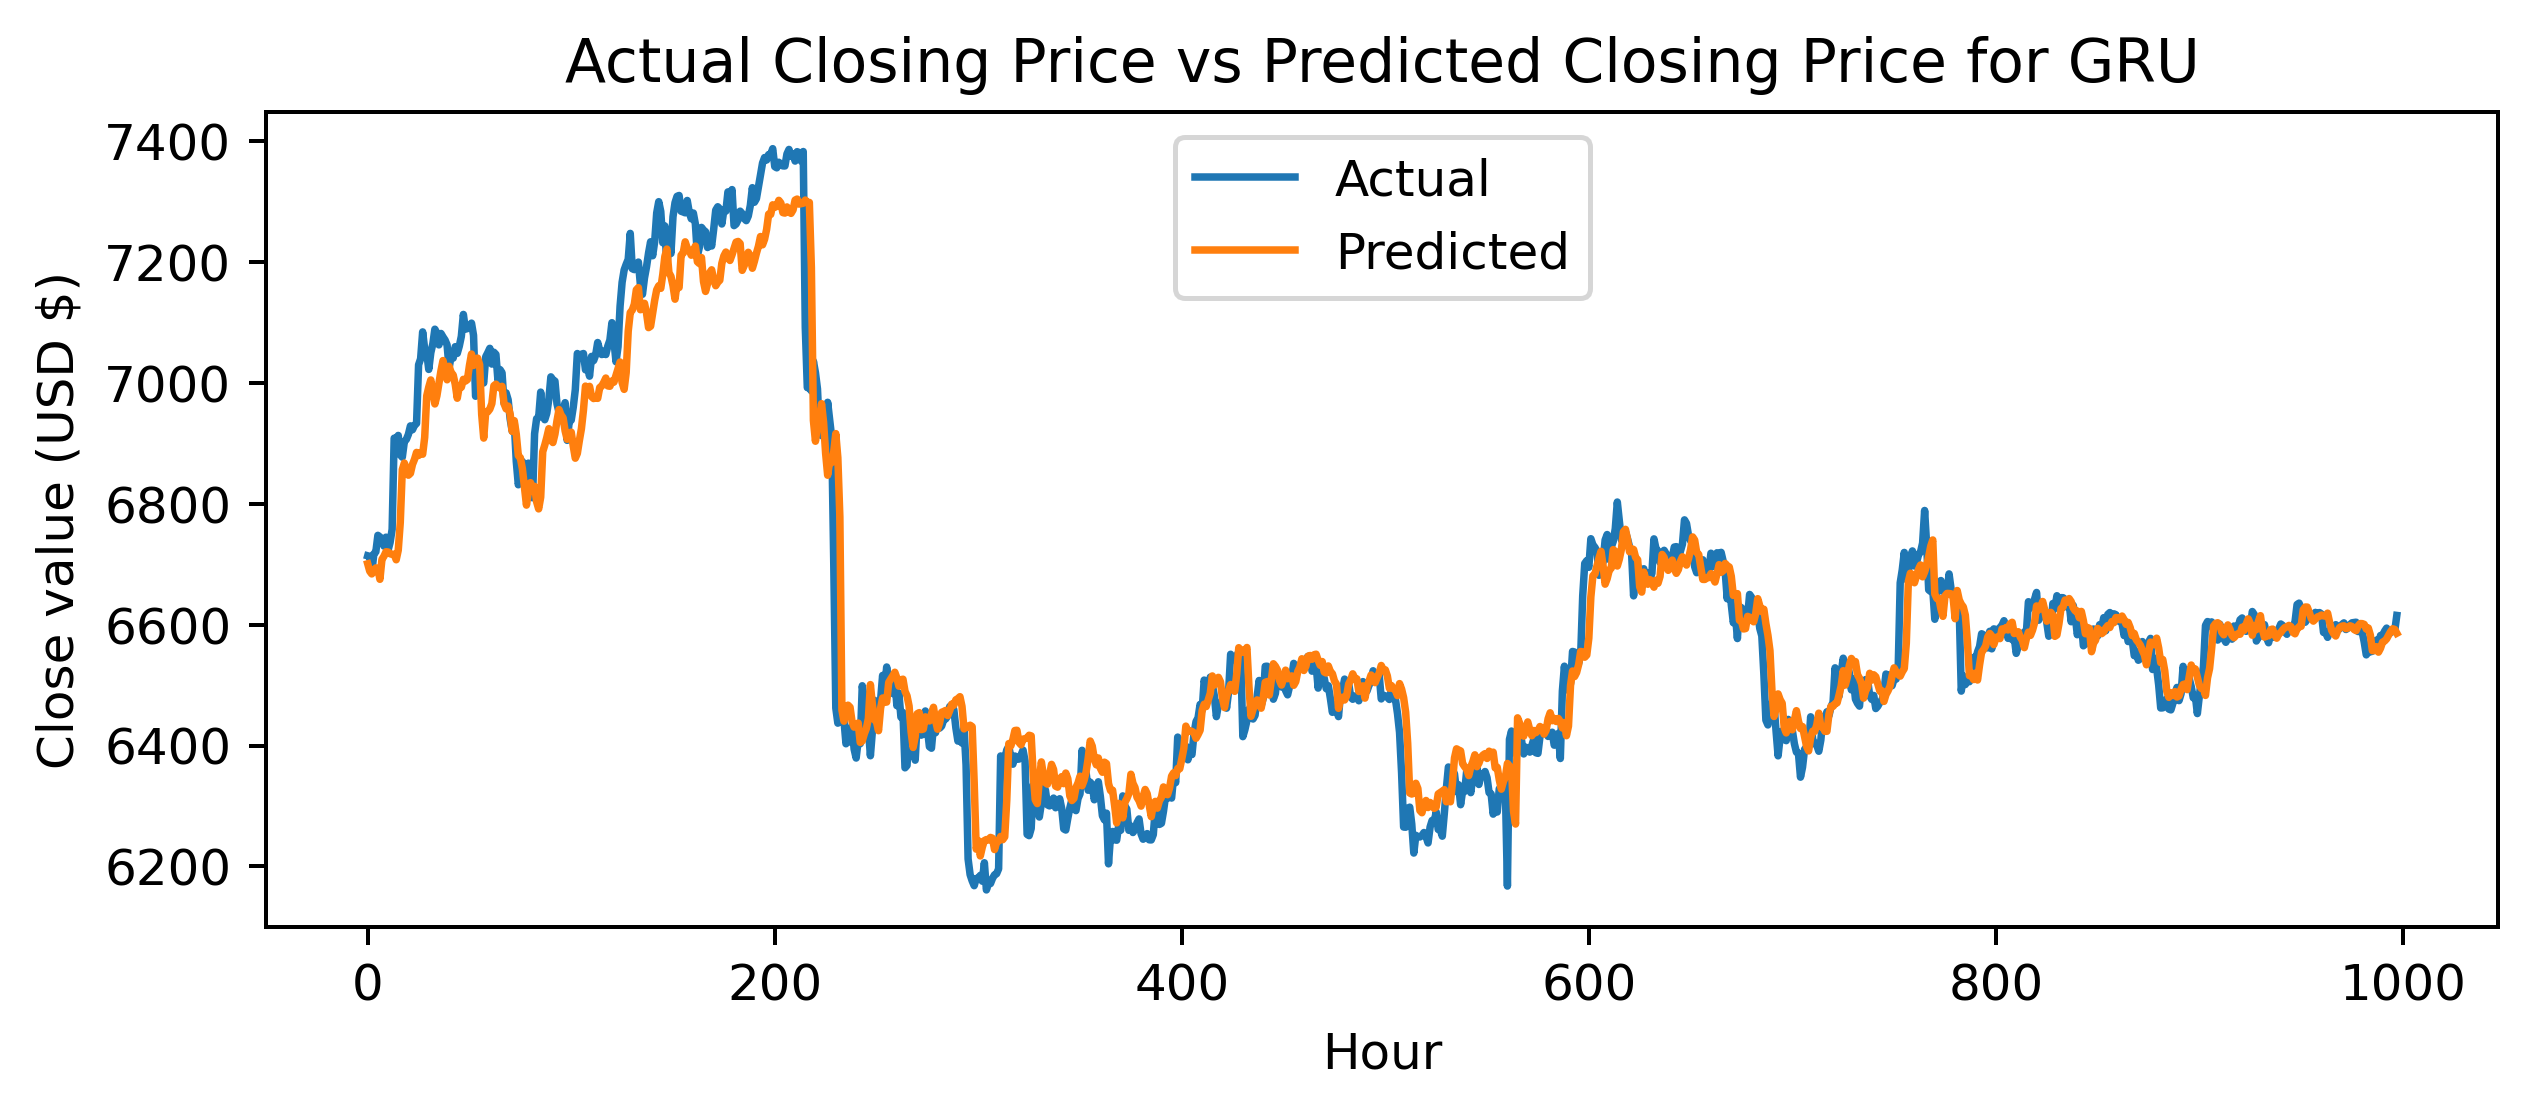

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_GRU_10k = len(prediction_GRU_10k)
plt.plot(np.arange(range_future_GRU_10k), np.array(y_test_10k), label='Actual')
plt.plot(np.arange(range_future_GRU_10k), np.array(prediction_GRU_10k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for GRU')
plt.legend(loc='upper center', prop = {'size':10})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Claculating Accuracy Metrics**

In [ ]:
mae_norm_GRU_10k = mean_absolute_error(M_10k, C_GRU_10k)

mse_norm_GRU_10k = mean_squared_error(M_10k, C_GRU_10k)

rmse_norm_GRU_10k = mean_squared_error(M_10k, C_GRU_10k, squared=False)

mape_norm_GRU_10k =mean_absolute_percentage_error(M_10k, C_GRU_10k)


accuracy_metrics_GRU_10k = pd.DataFrame()

MAPE_GRU_10k= []
RMSE_GRU_10k= []
MSE_GRU_10k= []
MAE_GRU_10k= []

MAPE_GRU_10k.append(mape_norm_GRU_10k)
RMSE_GRU_10k.append(rmse_norm_GRU_10k)
MSE_GRU_10k.append(mse_norm_GRU_10k)
MAE_GRU_10k.append(mae_norm_GRU_10k)

accuracy_metrics_GRU_10k['MAPE'] = MAPE_GRU_10k
accuracy_metrics_GRU_10k['RMSE'] = RMSE_GRU_10k
accuracy_metrics_GRU_10k['MSE'] = MSE_GRU_10k
accuracy_metrics_GRU_10k['MAE'] = MAE_GRU_10k

accuracy_metrics_GRU_10k

,MAPE,RMSE,MSE,MAE
0,0.011933,0.003875,0.000015,0.00267


**LSTM**

**Loading the Model from Disk**

In [ ]:
json_file_LSTM_10k = open ('LSTM_model_10k_lr001.json', 'r')
loaded_model_json_LSTM_10k = json_file_LSTM_10k.read()
json_file_LSTM_10k.close()
LSTM_10k = model_from_json(loaded_model_json_LSTM_10k)

LSTM_10k.load_weights("LSTM_model_10k_lr001.h5")
print("loaded LSTM model from disk")

loaded LSTM model from disk


**Predicting on Testing Data**

In [ ]:
prediction_LSTM_10k = LSTM_10k.predict(x_test_10k)

prediction_1D_LSTM_10k = prediction_LSTM_10k [:, 0, 0]

C_LSTM_10k=[]

for i in range (len(prediction_1D_LSTM_10k)):

  D=[]
  D.append(prediction_1D_LSTM_10k[i])
  C_LSTM_10k.append(D)



prediction_LSTM_10k=scaler_y_10k.inverse_transform(C_LSTM_10k)

**Table Showing Predicted vs Actual Values**

In [ ]:
dataCompare_LSTM_10k = pd.DataFrame()
dataTest_LSTM_10k= np.array(df_10k['Close'][validation_size_10k+LAG_10k:])
dataPredict_LSTM_10k= np.array(prediction_LSTM_10k)

dataCompare_LSTM_10k['Testing Data']=dataTest_LSTM_10k
dataCompare_LSTM_10k['Predicted Data']=dataPredict_LSTM_10k

dataCompare_LSTM_10k

,Testing Data,Predicted Data
0,6713.95,6784.550025
1,6713.01,6778.893049
2,6686.29,6793.801094
3,6717.00,6809.379419
4,6720.57,6773.618126
...,...,...
993,6584.00,6737.849327
994,6587.20,6739.232922
995,6588.54,6752.592241
996,6590.02,6748.501255


**Plotting Actual Values and Predicted Values**

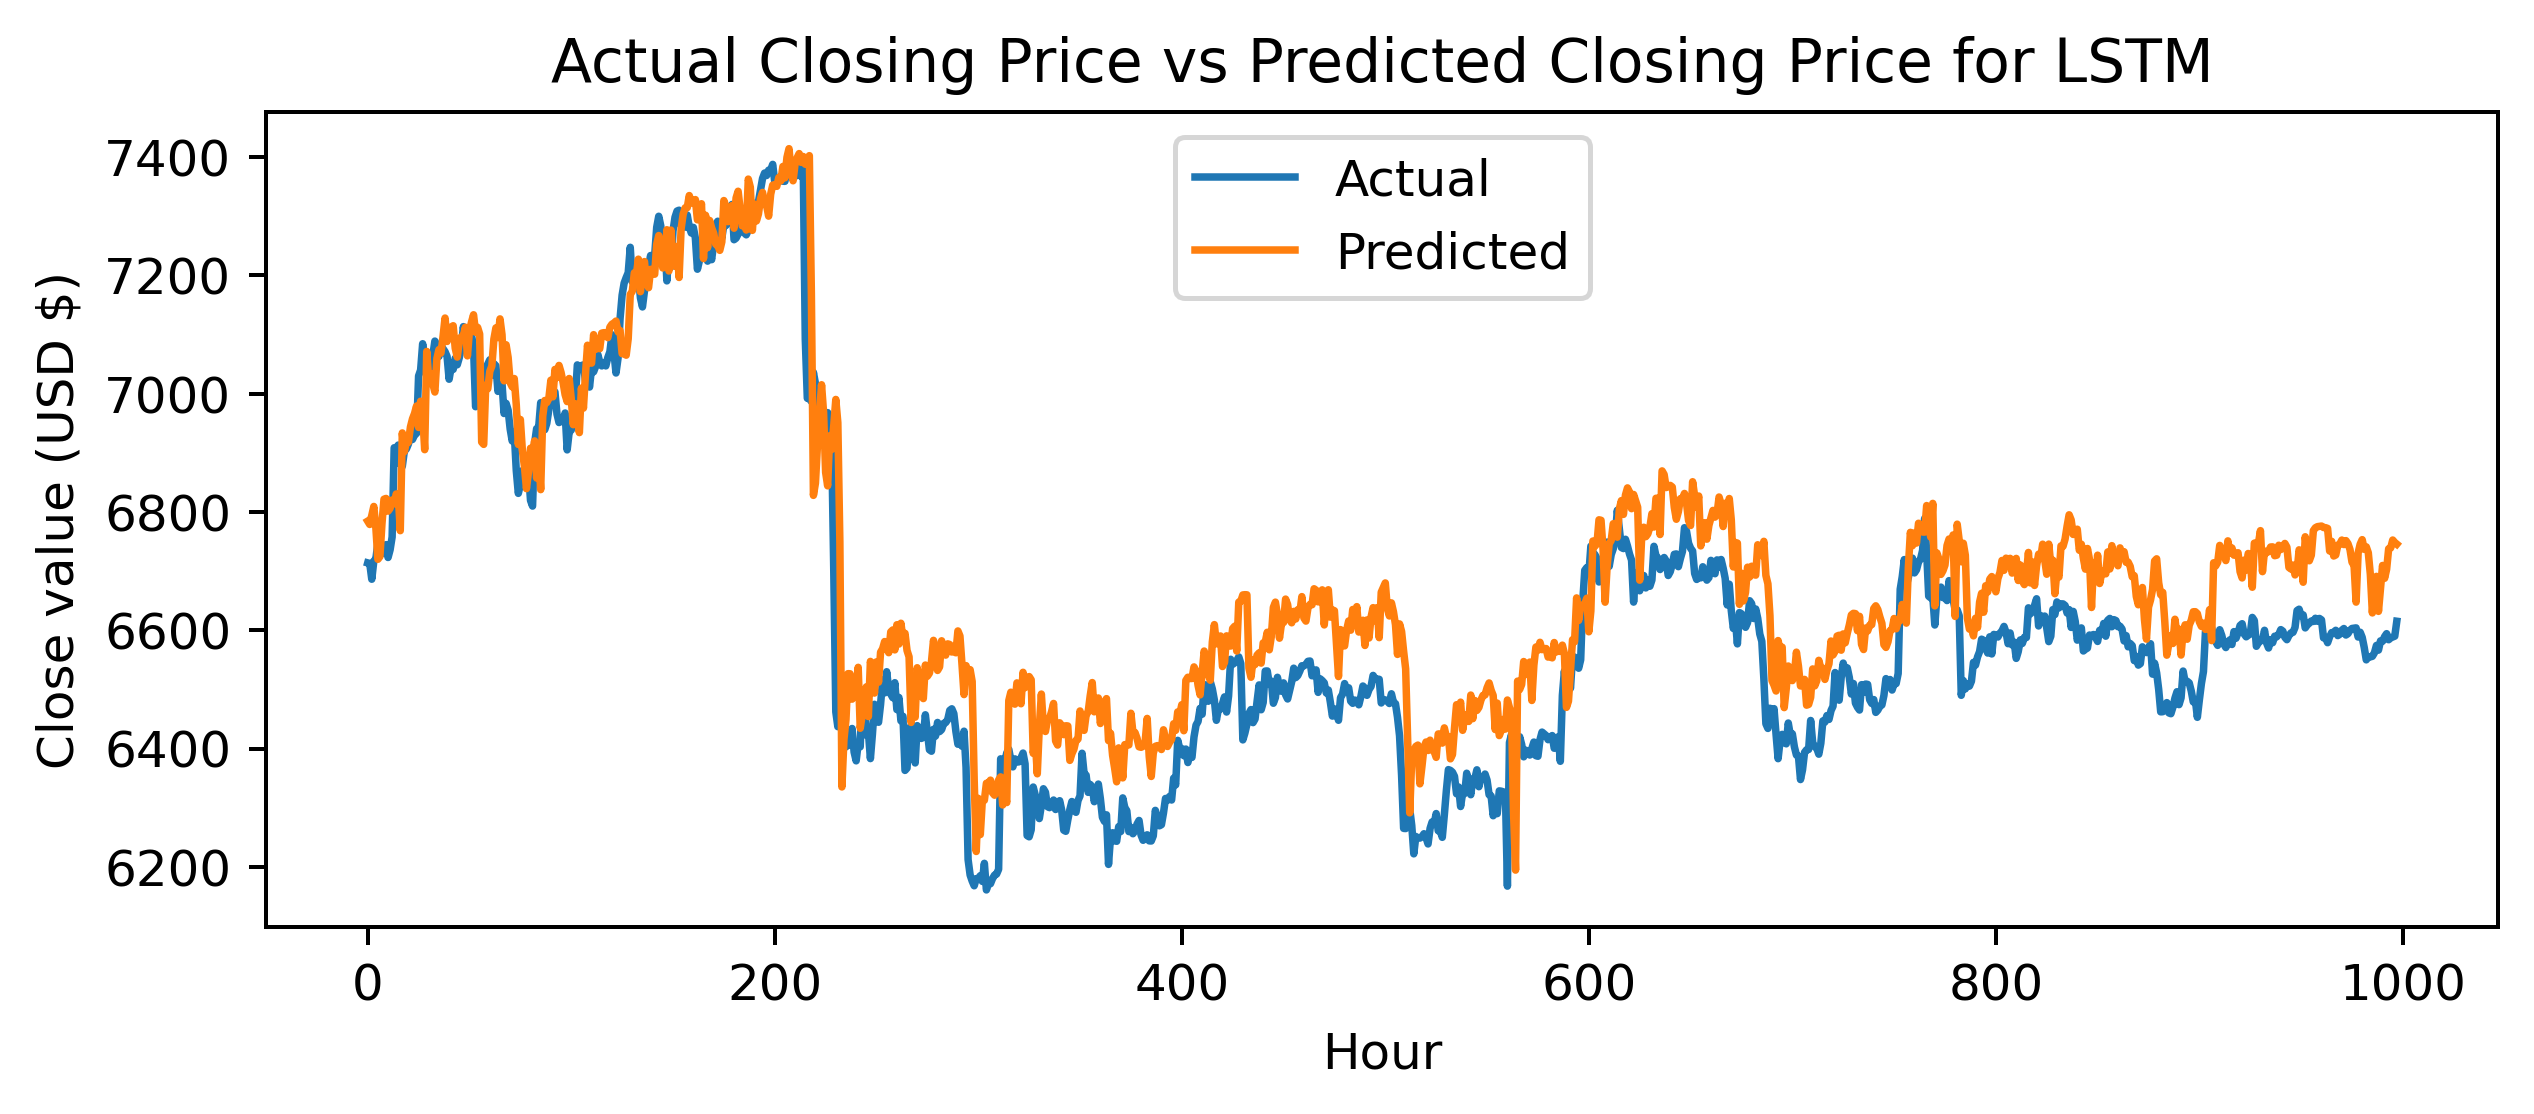

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_LSTM_10k = len(prediction_LSTM_10k)
plt.plot(np.arange(range_future_LSTM_10k), np.array(y_test_10k), label='Actual')
plt.plot(np.arange(range_future_LSTM_10k), np.array(prediction_LSTM_10k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for LSTM')
plt.legend(loc='upper center', prop = {'size':10})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Calculating Accuracy Metrics**

In [ ]:
mae_norm_LSTM_10k = mean_absolute_error(M_10k, C_LSTM_10k)

mse_norm_LSTM_10k = mean_squared_error(M_10k, C_LSTM_10k)

rmse_norm_LSTM_10k = mean_squared_error(M_10k, C_LSTM_10k, squared=False)

mape_norm_LSTM_10k =mean_absolute_percentage_error(M_10k, C_LSTM_10k)


accuracy_metrics_LSTM_10k = pd.DataFrame()

MAPE_LSTM_10k= []
RMSE_LSTM_10k= []
MSE_LSTM_10k= []
MAE_LSTM_10k= []

MAPE_LSTM_10k.append(mape_norm_LSTM_10k)
RMSE_LSTM_10k.append(rmse_norm_LSTM_10k)
MSE_LSTM_10k.append(mse_norm_LSTM_10k)
MAE_LSTM_10k.append(mae_norm_LSTM_10k)

accuracy_metrics_LSTM_10k['MAPE'] = MAPE_LSTM_10k
accuracy_metrics_LSTM_10k['RMSE'] = RMSE_LSTM_10k
accuracy_metrics_LSTM_10k['MSE'] = MSE_LSTM_10k
accuracy_metrics_LSTM_10k['MAE'] = MAE_LSTM_10k

accuracy_metrics_LSTM_10k

,MAPE,RMSE,MSE,MAE
0,0.027957,0.006992,0.000049,0.006011


****Results of 20k Dataset****

**GRU**

**Loading the Model from Disk**

In [ ]:
json_file_GRU_20k = open ('GRU_model_20k_epoch600.json', 'r')
loaded_model_json_GRU_20k = json_file_GRU_20k.read()
json_file_GRU_20k.close()
GRU_20k = model_from_json(loaded_model_json_GRU_20k)

GRU_20k.load_weights("GRU_model_20k_epoch600.h5")
print("loaded GRU model from disk")

loaded GRU model from disk


**Prediction on Testing Data**

In [ ]:
prediction_GRU_20k = GRU_20k.predict(x_test_20k)

prediction_1D_GRU_20k = prediction_GRU_20k [:, 0, 0]

C_GRU_20k=[]

for i in range (len(prediction_1D_GRU_20k)):

  D=[]
  D.append(prediction_1D_GRU_20k[i])
  C_GRU_20k.append(D)



prediction_GRU_20k=scaler_y_20k.inverse_transform(C_GRU_20k)

**Table Showing Actual vs Predicted Values**

In [ ]:
dataCompare_GRU_20k = pd.DataFrame()
dataTest_GRU_20k= np.array(df_20k['Close'][validation_size_20k+LAG_20k:])
dataPredict_GRU_20k= np.array(prediction_GRU_20k)

dataCompare_GRU_20k['Testing Data']=dataTest_GRU_20k
dataCompare_GRU_20k['Predicted Data']=dataPredict_GRU_20k

dataCompare_GRU_20k

,Testing Data,Predicted Data
0,10834.87,10505.707312
1,10821.00,10548.496165
2,10788.86,10532.704671
3,10820.99,10369.498549
4,10843.00,10580.202250
...,...,...
1993,7444.12,7388.296936
1994,7455.67,7376.394019
1995,7459.51,7382.620946
1996,7609.28,7358.490355


**Plotting Actual Values and Predicted Values**

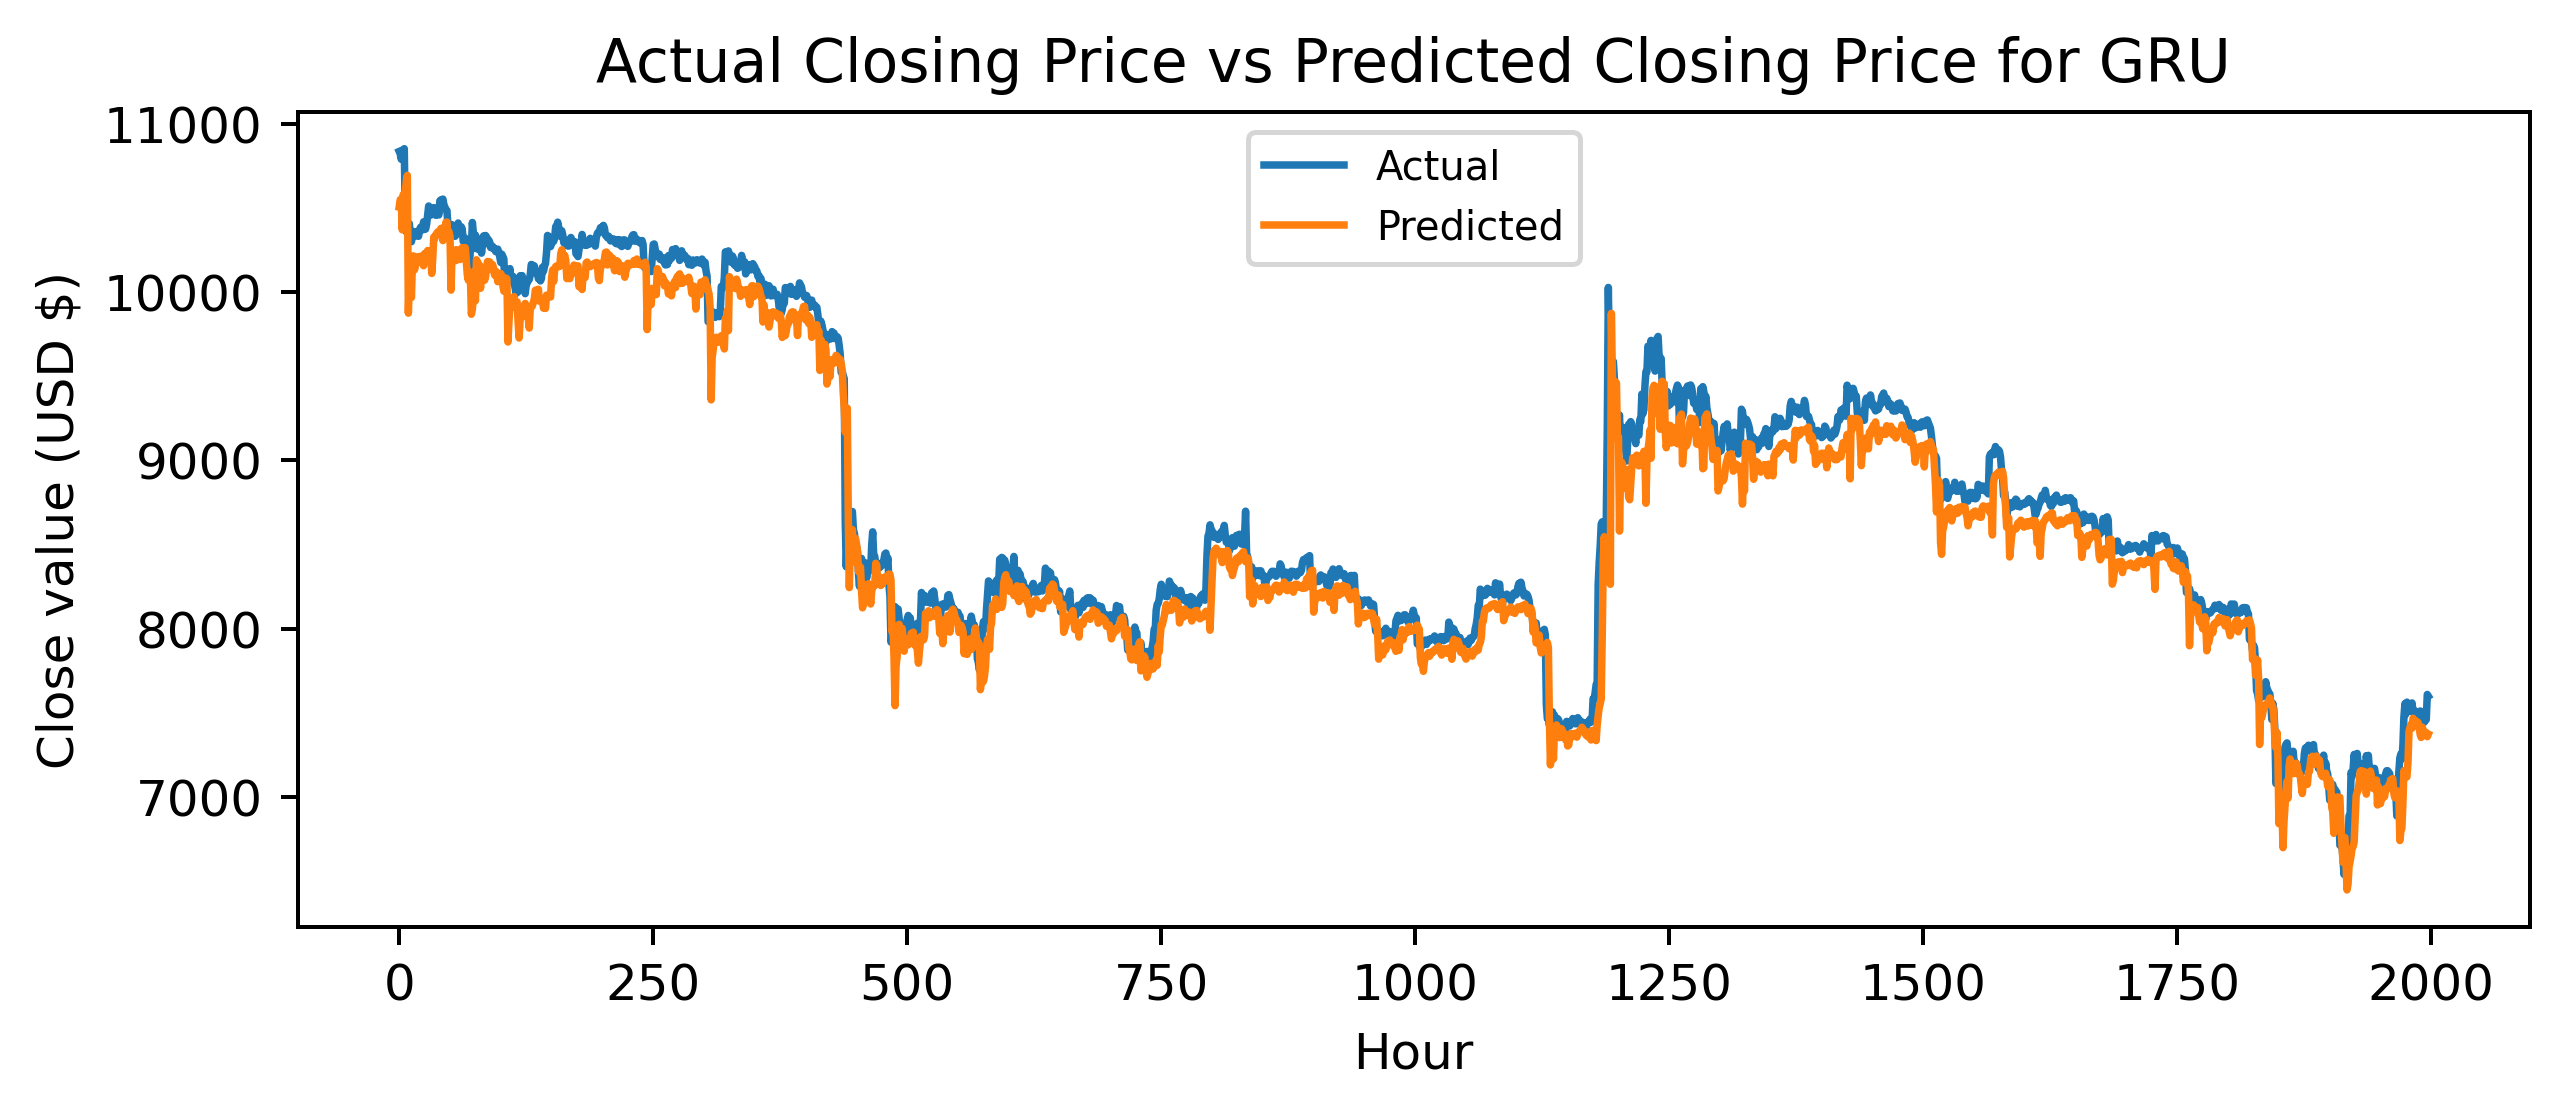

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_GRU_20k = len(prediction_GRU_20k)
plt.plot(np.arange(range_future_GRU_20k), np.array(y_test_20k), label='Actual')
plt.plot(np.arange(range_future_GRU_20k), np.array(prediction_GRU_20k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for GRU')
plt.legend(loc='upper center', prop={'size':8})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Calculating Accuracy Metrics**

In [ ]:
mae_norm_GRU_20k = mean_absolute_error(M_20k, C_GRU_20k)

mse_norm_GRU_20k = mean_squared_error(M_20k, C_GRU_20k)

rmse_norm_GRU_20k = mean_squared_error(M_20k, C_GRU_20k, squared=False)

mape_norm_GRU_20k =mean_absolute_percentage_error(M_20k, C_GRU_20k)


accuracy_metrics_GRU_20k = pd.DataFrame()

MAPE_GRU_20k= []
RMSE_GRU_20k= []
MSE_GRU_20k= []
MAE_GRU_20k= []

MAPE_GRU_20k.append(mape_norm_GRU_20k)
RMSE_GRU_20k.append(rmse_norm_GRU_20k)
MSE_GRU_20k.append(mse_norm_GRU_20k)
MAE_GRU_20k.append(mae_norm_GRU_20k)

accuracy_metrics_GRU_20k['MAPE'] = MAPE_GRU_20k
accuracy_metrics_GRU_20k['RMSE'] = RMSE_GRU_20k
accuracy_metrics_GRU_20k['MSE'] = MSE_GRU_20k
accuracy_metrics_GRU_20k['MAE'] = MAE_GRU_20k

accuracy_metrics_GRU_20k

,MAPE,RMSE,MSE,MAE
0,0.023737,0.010689,0.000114,0.008305


**LSTM**

**Loading the Model from Disk**

In [ ]:
json_file_LSTM_20k = open ('LSTM_model_20k_batch256.json', 'r')
loaded_model_json_LSTM_20k = json_file_LSTM_20k.read()
json_file_LSTM_20k.close()
LSTM_20k = model_from_json(loaded_model_json_LSTM_20k)

LSTM_20k.load_weights("LSTM_model_20k_batch256.h5")
print("loaded LSTM model from disk")

loaded LSTM model from disk


**Predicting on Testing Data**

In [ ]:
prediction_LSTM_20k = LSTM_20k.predict(x_test_20k)

prediction_1D_LSTM_20k = prediction_LSTM_20k [:, 0, 0]

C_LSTM_20k=[]

for i in range (len(prediction_1D_LSTM_20k)):

  D=[]
  D.append(prediction_1D_LSTM_20k[i])
  C_LSTM_20k.append(D)



prediction_LSTM_20k=scaler_y_20k.inverse_transform(C_LSTM_20k)

**Table Showing Predicted vs Actual Values**

In [ ]:
dataCompare_LSTM_20k = pd.DataFrame()
dataTest_LSTM_20k= np.array(df_20k['Close'][validation_size_20k+LAG_20k:])
dataPredict_LSTM_20k= np.array(prediction_LSTM_20k)

dataCompare_LSTM_20k['Testing Data']=dataTest_LSTM_20k
dataCompare_LSTM_20k['Predicted Data']=dataPredict_LSTM_20k

dataCompare_LSTM_20k

,Testing Data,Predicted Data
0,10834.87,10567.638309
1,10821.00,10579.924530
2,10788.86,10586.440185
3,10820.99,10510.008715
4,10843.00,10664.635550
...,...,...
1993,7444.12,7442.389733
1994,7455.67,7429.036168
1995,7459.51,7427.012567
1996,7609.28,7408.563971


**Plotting Actual Values vs Predicted Values**

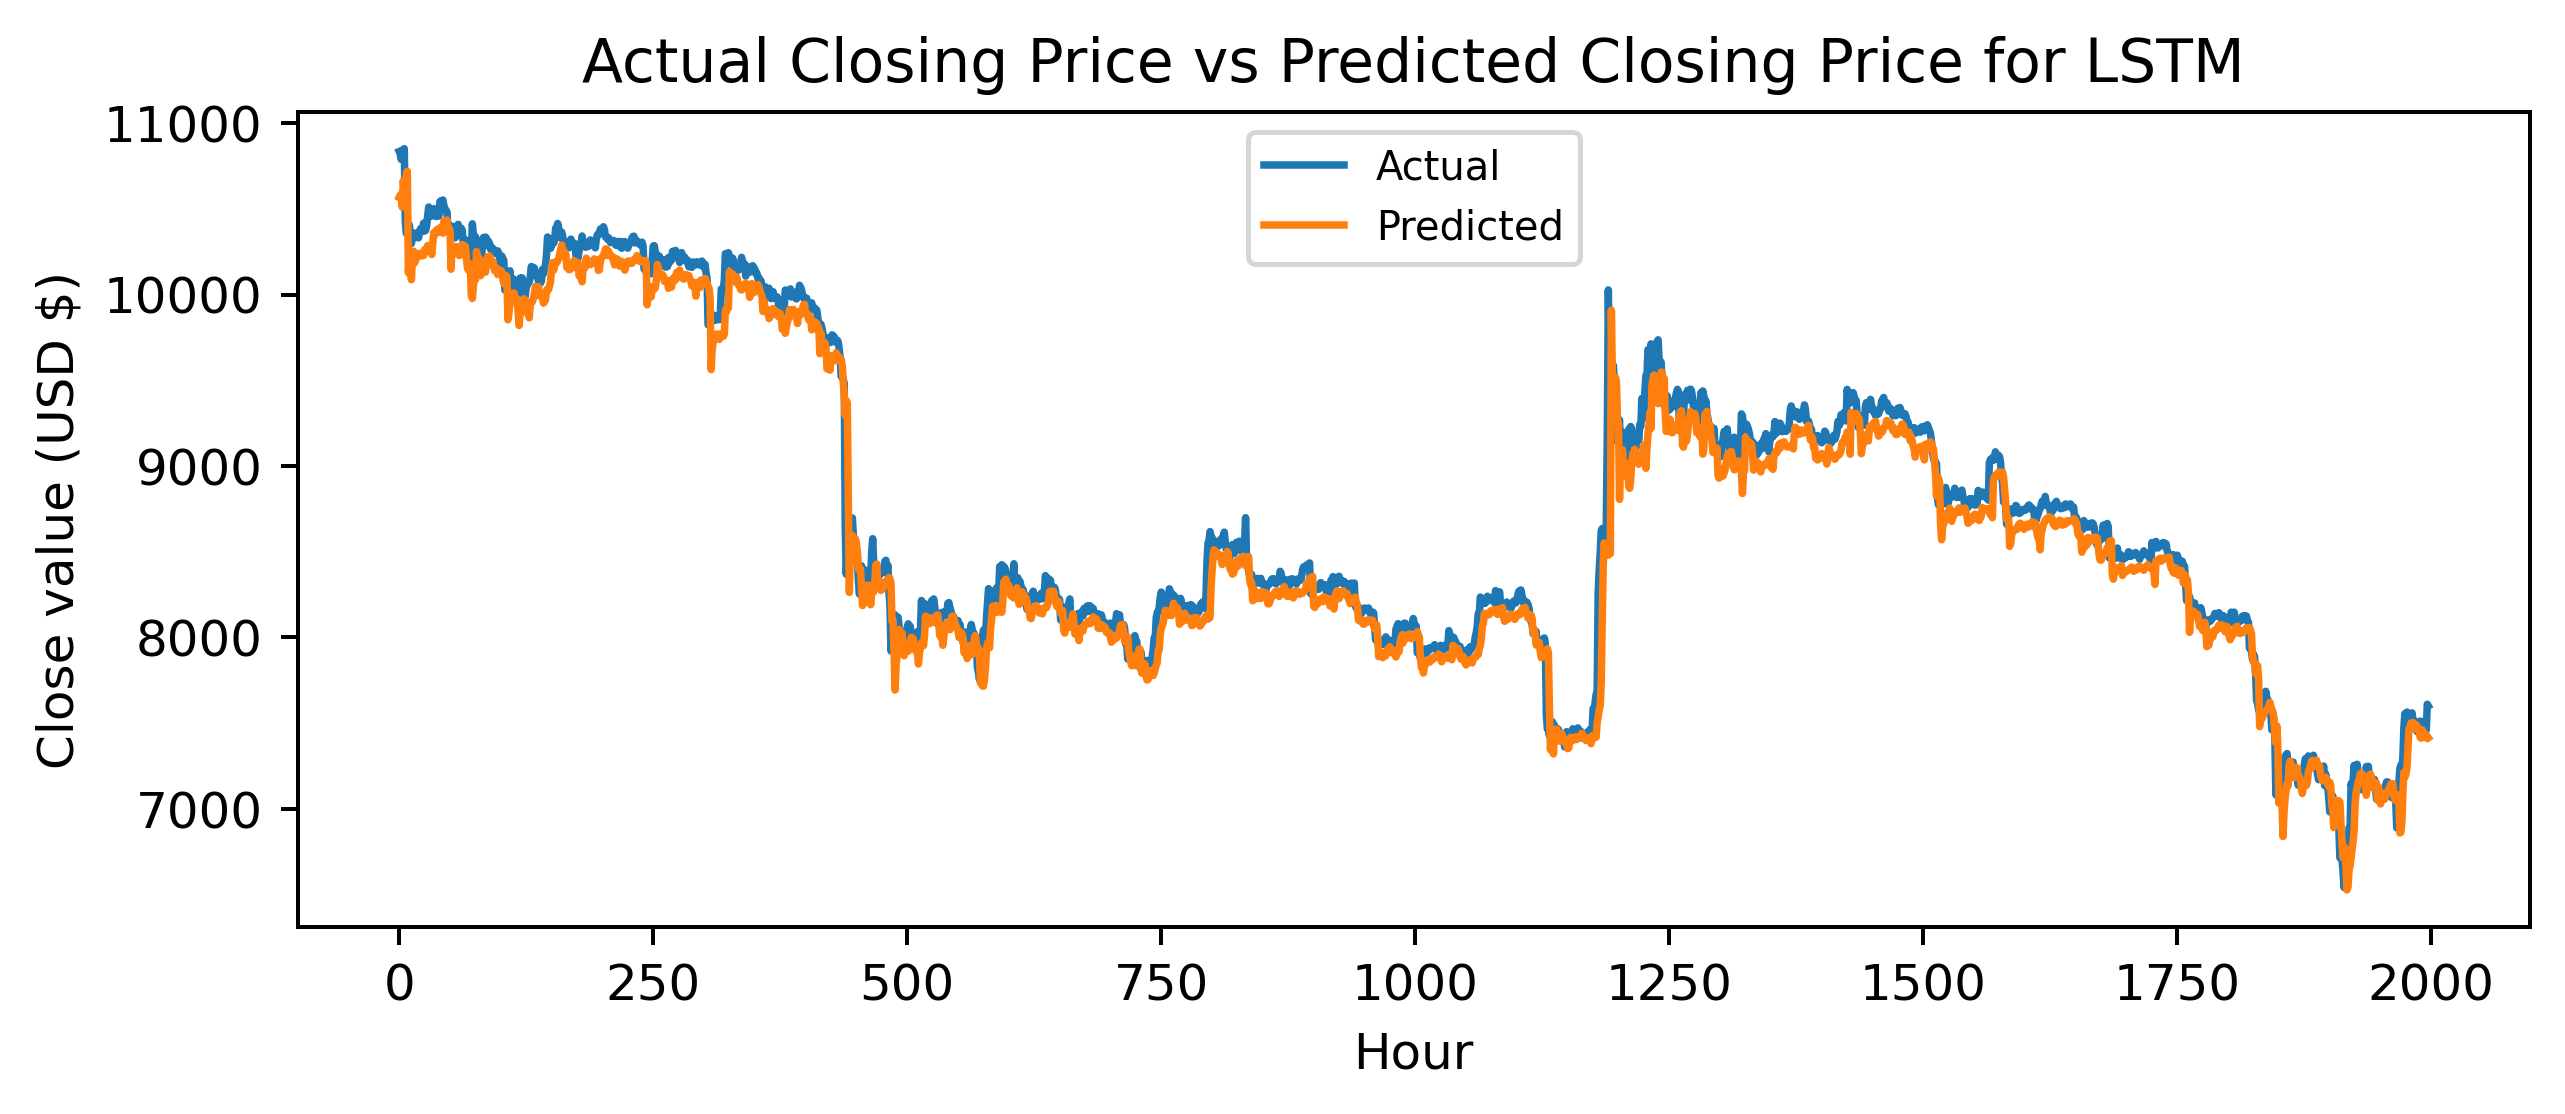

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_LSTM_20k = len(prediction_LSTM_20k)
plt.plot(np.arange(range_future_LSTM_20k), np.array(y_test_20k), label='Actual')
plt.plot(np.arange(range_future_LSTM_20k), np.array(prediction_LSTM_20k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for LSTM')
plt.legend(loc='upper center', prop={'size':8})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Calculating Accuracy Metrics**

In [ ]:
mae_norm_LSTM_20k = mean_absolute_error(M_20k, C_LSTM_20k)

mse_norm_LSTM_20k = mean_squared_error(M_20k, C_LSTM_20k)

rmse_norm_LSTM_20k = mean_squared_error(M_20k, C_LSTM_20k, squared=False)

mape_norm_LSTM_20k =mean_absolute_percentage_error(M_20k, C_LSTM_20k)


accuracy_metrics_LSTM_20k = pd.DataFrame()

MAPE_LSTM_20k= []
RMSE_LSTM_20k= []
MSE_LSTM_20k= []
MAE_LSTM_20k= []

MAPE_LSTM_20k.append(mape_norm_LSTM_20k)
RMSE_LSTM_20k.append(rmse_norm_LSTM_20k)
MSE_LSTM_20k.append(mse_norm_LSTM_20k)
MAE_LSTM_20k.append(mae_norm_LSTM_20k)

accuracy_metrics_LSTM_20k['MAPE'] = MAPE_LSTM_20k
accuracy_metrics_LSTM_20k['RMSE'] = RMSE_LSTM_20k
accuracy_metrics_LSTM_20k['MSE'] = MSE_LSTM_20k
accuracy_metrics_LSTM_20k['MAE'] = MAE_LSTM_20k

accuracy_metrics_LSTM_20k

,MAPE,RMSE,MSE,MAE
0,0.018337,0.008656,0.000075,0.006389


****Results of 40k Dataset****

**GRU**

**Loading the Model from Disk**

In [ ]:
json_file_GRU_40k = open ('GRU_model_40k_lr0001.json', 'r')
loaded_model_json_GRU_40k = json_file_GRU_40k.read()
json_file_GRU_40k.close()
GRU_40k = model_from_json(loaded_model_json_GRU_40k)

GRU_40k.load_weights("GRU_model_40k_lr0001.h5")
print("loaded GRU model from disk")

loaded GRU model from disk


**Predicting on Testing Data**

In [ ]:
prediction_GRU_40k = GRU_40k.predict(x_test_40k)

prediction_1D_GRU_40k = prediction_GRU_40k [:, 0, 0]

C_GRU_40k=[]

for i in range (len(prediction_1D_GRU_40k)):

  D=[]
  D.append(prediction_1D_GRU_40k[i])
  C_GRU_40k.append(D)



prediction_GRU_40k=scaler_y_40k.inverse_transform(C_GRU_40k)

**Table Showing Actual vs Predicted Values**

In [ ]:
dataCompare_GRU_40k = pd.DataFrame()
dataTest_GRU_40k= np.array(df_40k['Close'][validation_size_40k+LAG_40k:])
dataPredict_GRU_40k= np.array(prediction_GRU_40k)

dataCompare_GRU_40k['Testing Data']=dataTest_GRU_40k
dataCompare_GRU_40k['Predicted Data']=dataPredict_GRU_40k

dataCompare_GRU_40k

,Testing Data,Predicted Data
0,36767.47,33951.261160
1,38313.40,34502.080598
2,38043.69,35631.797381
3,38283.98,37471.436841
4,38270.26,38226.478949
...,...,...
3830,47391.82,48379.012692
3831,47319.67,48187.957972
3832,47440.74,48076.440170
3833,47722.65,48108.465155


**Plotting Actual Values and Predicted Values**

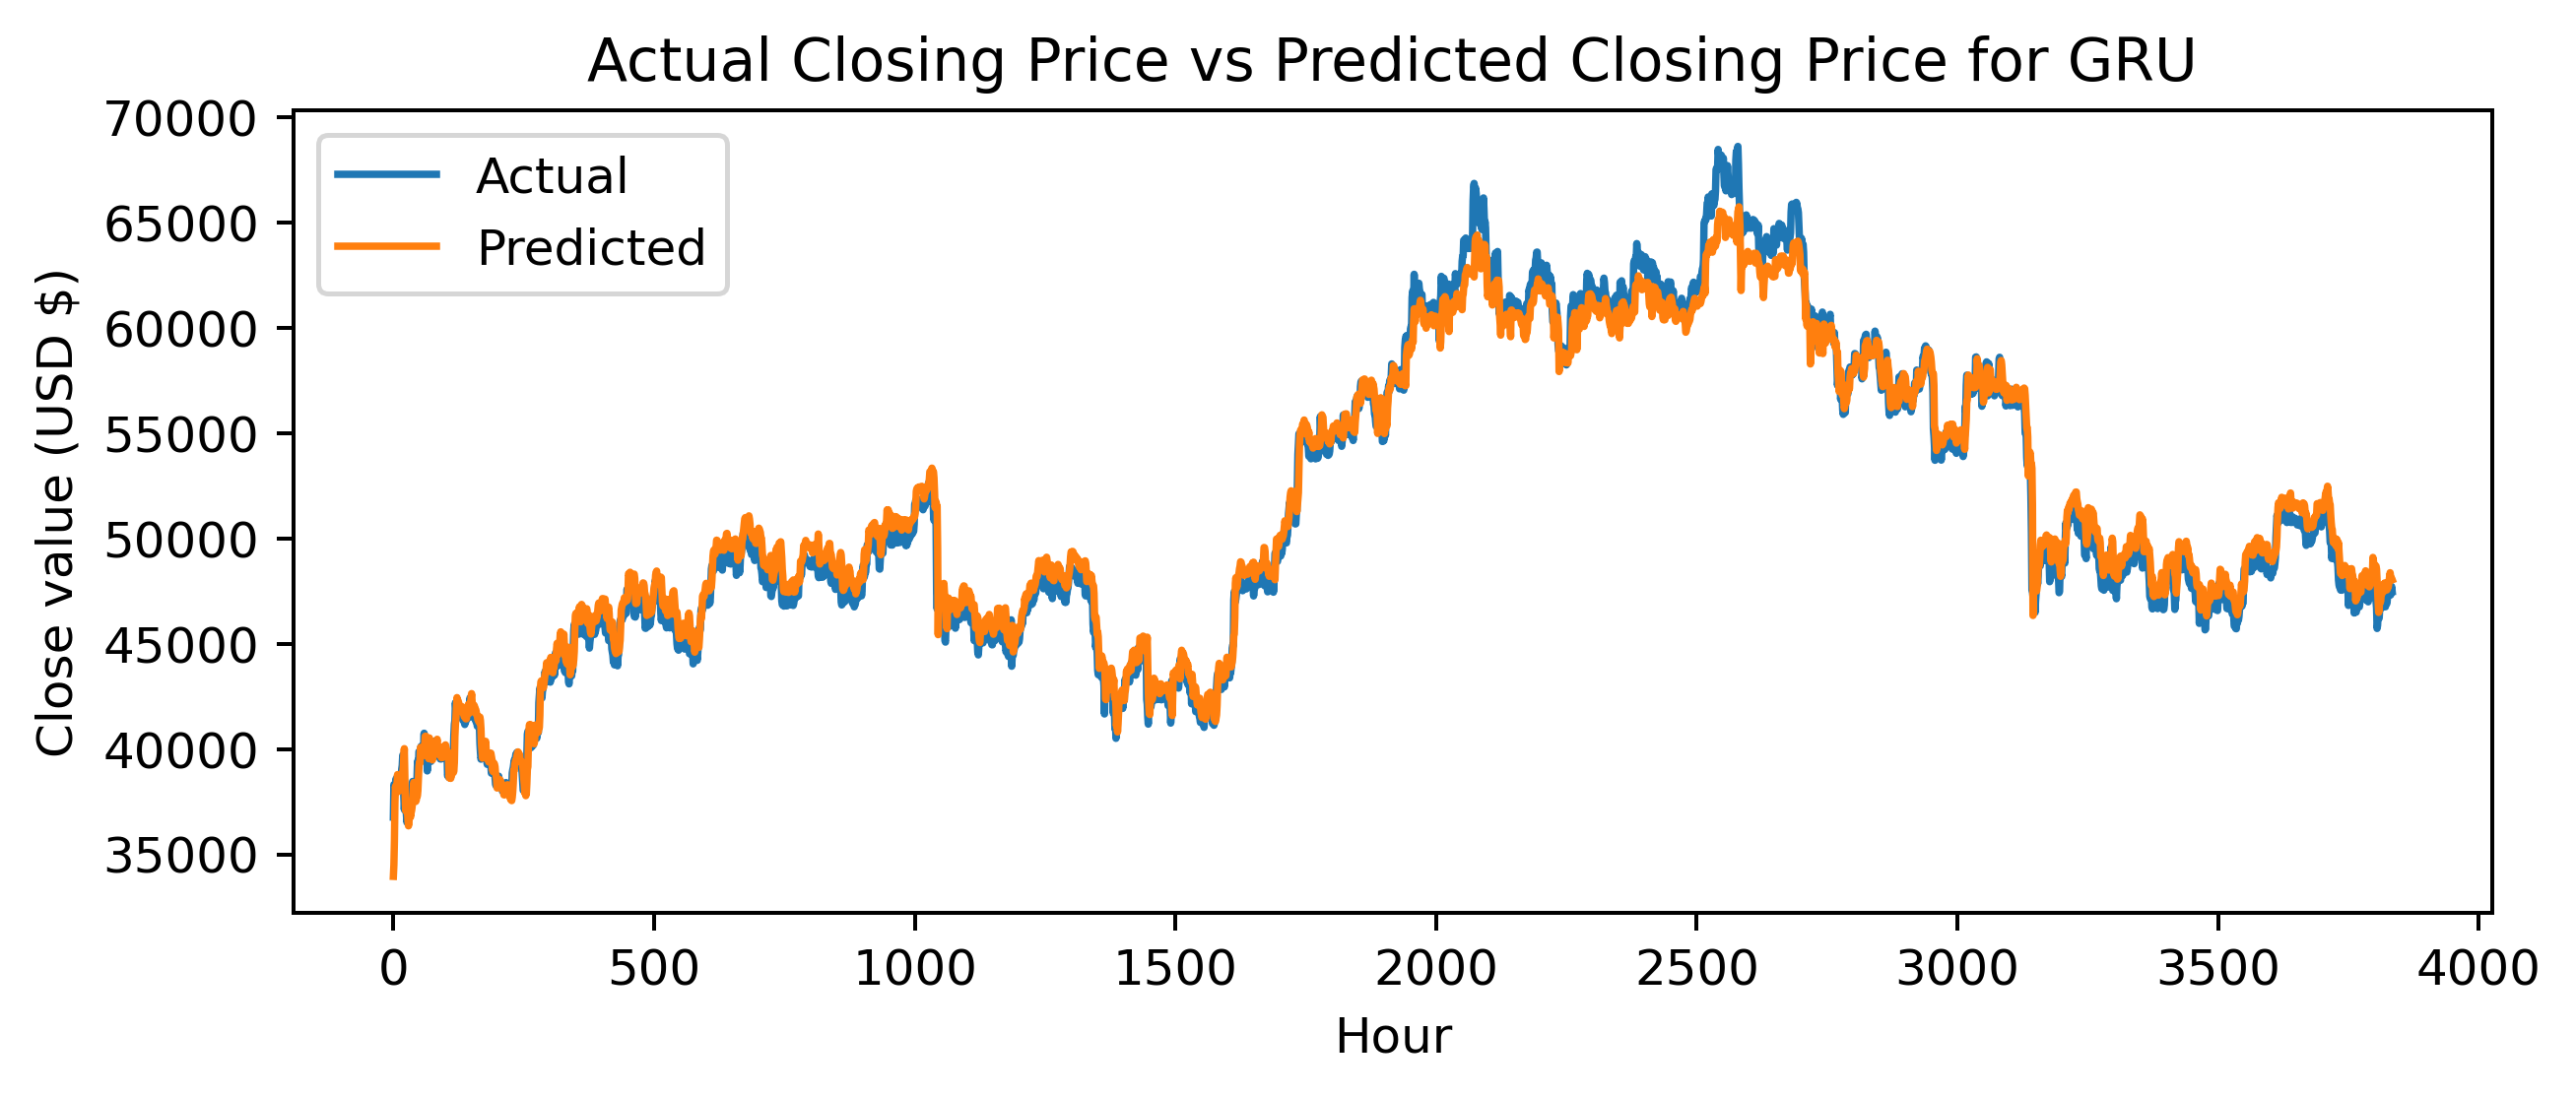

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_GRU_40k = len(prediction_GRU_40k)
plt.plot(np.arange(range_future_GRU_40k), np.array(y_test_40k), label='Actual')
plt.plot(np.arange(range_future_GRU_40k), np.array(prediction_GRU_40k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for GRU')
plt.legend(loc='upper left', prop = {'size':10})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Calculating Accuracy Metrics**

In [ ]:
mae_norm_GRU_40k = mean_absolute_error(M_40k, C_GRU_40k)

mse_norm_GRU_40k = mean_squared_error(M_40k, C_GRU_40k)

rmse_norm_GRU_40k = mean_squared_error(M_40k, C_GRU_40k, squared=False)

mape_norm_GRU_40k =mean_absolute_percentage_error(M_40k, C_GRU_40k)


accuracy_metrics_GRU_40k = pd.DataFrame()

MAPE_GRU_40k= []
RMSE_GRU_40k= []
MSE_GRU_40k= []
MAE_GRU_40k= []

MAPE_GRU_40k.append(mape_norm_GRU_40k)
RMSE_GRU_40k.append(rmse_norm_GRU_40k)
MSE_GRU_40k.append(mse_norm_GRU_40k)
MAE_GRU_40k.append(mae_norm_GRU_40k)

accuracy_metrics_GRU_40k['MAPE'] = MAPE_GRU_40k
accuracy_metrics_GRU_40k['RMSE'] = RMSE_GRU_40k
accuracy_metrics_GRU_40k['MSE'] = MSE_GRU_40k
accuracy_metrics_GRU_40k['MAE'] = MAE_GRU_40k

accuracy_metrics_GRU_40k

,MAPE,RMSE,MSE,MAE
0,0.014777,0.01474,0.000217,0.011694


**LSTM**

**Loading the Model from Disk**

In [ ]:
json_file_LSTM_40k = open ('LSTM_model_40k_lr0001.json', 'r')
loaded_model_json_LSTM_40k = json_file_LSTM_40k.read()
json_file_LSTM_40k.close()
LSTM_40k = model_from_json(loaded_model_json_LSTM_40k)

LSTM_40k.load_weights("LSTM_model_40k_lr0001.h5")
print("loaded LSTM model from disk")

loaded LSTM model from disk


**Predicting on Testing Data**

In [ ]:
prediction_LSTM_40k = LSTM_40k.predict(x_test_40k)

prediction_1D_LSTM_40k = prediction_LSTM_40k [:, 0, 0]

C_LSTM_40k=[]

for i in range (len(prediction_1D_LSTM_40k)):

  D=[]
  D.append(prediction_1D_LSTM_40k[i])
  C_LSTM_40k.append(D)



prediction_LSTM_40k=scaler_y_40k.inverse_transform(C_LSTM_40k)

**Table Showing Actual and Predicted Values**

In [ ]:
dataCompare_LSTM_40k = pd.DataFrame()
dataTest_LSTM_40k= np.array(df_40k['Close'][validation_size_40k+LAG_40k:])
dataPredict_LSTM_40k= np.array(prediction_LSTM_40k)

dataCompare_LSTM_40k['Testing Data']=dataTest_LSTM_40k
dataCompare_LSTM_40k['Predicted Data']=dataPredict_LSTM_40k

dataCompare_LSTM_40k

,Testing Data,Predicted Data
0,36767.47,34077.677892
1,38313.40,34122.573142
2,38043.69,34722.697973
3,38283.98,35832.440486
4,38270.26,37334.450467
...,...,...
3830,47391.82,47606.491719
3831,47319.67,47416.462357
3832,47440.74,47306.704937
3833,47722.65,47337.450980


**Plotting Actual Values vs Predicted Values**

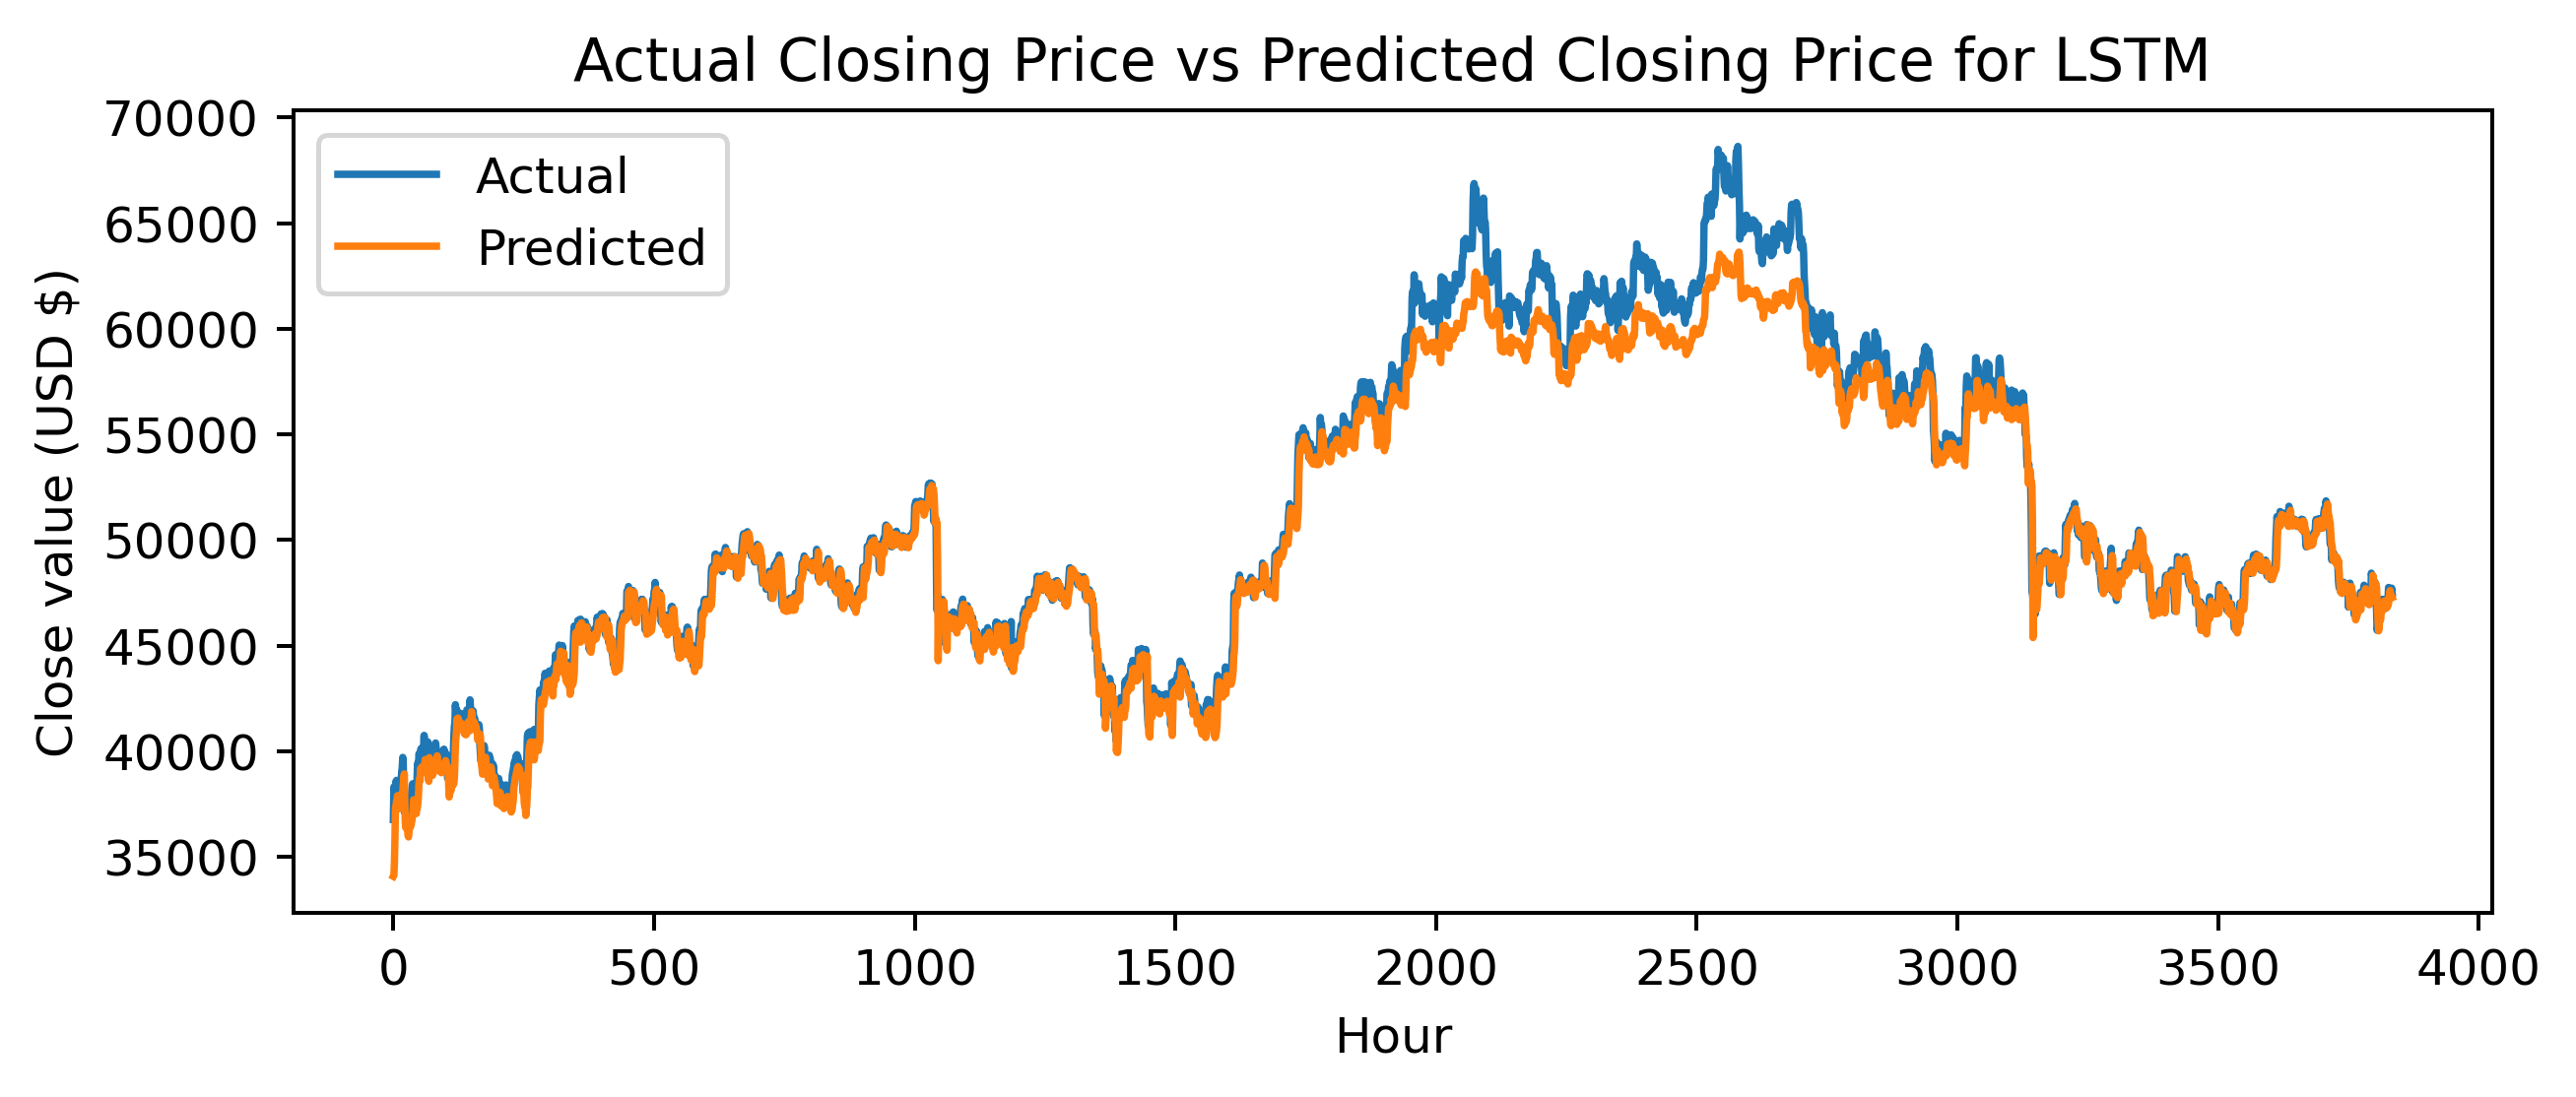

In [ ]:
plt.figure(figsize=(8, 3))
plt.rcParams['figure.dpi'] = 360
range_future_LSTM_40k = len(prediction_LSTM_40k)
plt.plot(np.arange(range_future_LSTM_40k), np.array(y_test_40k), label='Actual')
plt.plot(np.arange(range_future_LSTM_40k), np.array(prediction_LSTM_40k),label='Predicted')

plt.title('Actual Closing Price vs Predicted Closing Price for LSTM')
plt.legend(loc='upper left', prop = {'size': 10})
plt.xlabel('Hour')
plt.ylabel('Close value (USD $)')

plt.show()

**Calculating Accuracy Metrics**

In [ ]:
mae_norm_LSTM_40k = mean_absolute_error(M_40k, C_LSTM_40k)

mse_norm_LSTM_40k = mean_squared_error(M_40k, C_LSTM_40k)

rmse_norm_LSTM_40k = mean_squared_error(M_40k, C_LSTM_40k, squared=False)

mape_norm_LSTM_40k =mean_absolute_percentage_error(M_40k, C_LSTM_40k)


accuracy_metrics_LSTM_40k = pd.DataFrame()

MAPE_LSTM_40k= []
RMSE_LSTM_40k= []
MSE_LSTM_40k= []
MAE_LSTM_40k= []

MAPE_LSTM_40k.append(mape_norm_LSTM_40k)
RMSE_LSTM_40k.append(rmse_norm_LSTM_40k)
MSE_LSTM_40k.append(mse_norm_LSTM_40k)
MAE_LSTM_40k.append(mae_norm_LSTM_40k)

accuracy_metrics_LSTM_40k['MAPE'] = MAPE_LSTM_40k
accuracy_metrics_LSTM_40k['RMSE'] = RMSE_LSTM_40k
accuracy_metrics_LSTM_40k['MSE'] = MSE_LSTM_40k
accuracy_metrics_LSTM_40k['MAE'] = MAE_LSTM_40k

accuracy_metrics_LSTM_40k

,MAPE,RMSE,MSE,MAE
0,0.016969,0.02133,0.000455,0.014459


**Creating a Table that Summarizes the Findings**

In [ ]:
data = [["RMSE-GRU", 0.0038, 0.010, 0.014], ["RMSE-LSTM", 0.0069, 0.0086, 0.021],
        ["MAPE-GRU", 0.011, 0.023, 0.014], ["MAPE-LSTM", 0.027, 0.018, 0.016]]

col_names = ["Metric-Model", "10k Dataset", "20k Dataset", "40k Dataset"]

print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════╤═══════════════╤═══════════════╤═══════════════╕
│ Metric-Model   │   10k Dataset │   20k Dataset │   40k Dataset │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ RMSE-GRU       │        0.0038 │        0.01   │         0.014 │
├────────────────┼───────────────┼───────────────┼───────────────┤
│ RMSE-LSTM      │        0.0069 │        0.0086 │         0.021 │
├────────────────┼───────────────┼───────────────┼───────────────┤
│ MAPE-GRU       │        0.011  │        0.023  │         0.014 │
├────────────────┼───────────────┼───────────────┼───────────────┤
│ MAPE-LSTM      │        0.027  │        0.018  │         0.016 │
╘════════════════╧═══════════════╧═══════════════╧═══════════════╛
